`uv add librosa`

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 음악 파일 불러오기

In [ ]:
y, sr = librosa.load("../data/raw/1000.wav")
print(y, sr)

[ 6.5153290e-06 -1.4558755e-06 -2.1608721e-06 ... -5.2233940e-05
 -2.4399051e-05 -1.9451705e-05] 22050


In [5]:
len(y) / sr # sr : 초당 진폭 수
# 사운드 파일의 길이

3.526530612244898

## 음악 파일 시각화

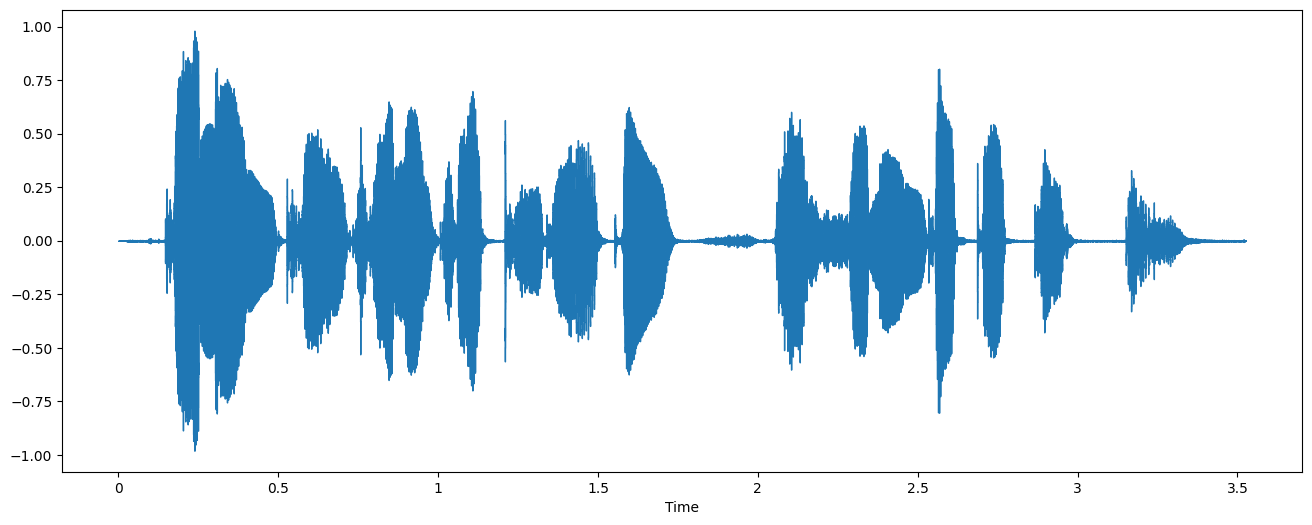

In [10]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y = y, sr = sr)
plt.show()

## Melspectogram으로 변환하기

In [12]:
melspec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=2048, # 푸리에변환을 하기위한 윈도우 크기
    hop_length=512,
    win_length=None,
    window="hann", # 음악을 잘랐을 때, 양사이드를 부드럽게 만들어줌
    center=True,
    pad_mode='reflect',
    power=2.0,
    n_mels=128
)

In [13]:
melspec

array([[4.2344065e-05, 1.5206612e-04, 3.9671225e-04, ..., 3.2406920e-04,
        3.1798580e-04, 3.2190996e-04],
       [1.6390451e-04, 2.0275372e-03, 6.8371585e-03, ..., 1.4306332e-02,
        1.0536312e-02, 8.7772580e-03],
       [1.8392780e-04, 3.3236430e-03, 8.5051237e-03, ..., 1.8340588e-02,
        1.4482977e-02, 1.1335718e-02],
       ...,
       [1.7009233e-07, 1.4651030e-06, 3.8835765e-06, ..., 2.8380616e-06,
        2.4672402e-06, 2.7969220e-06],
       [7.2648668e-08, 6.7430574e-07, 1.9138033e-06, ..., 2.2029471e-06,
        2.1132387e-06, 1.8460801e-06],
       [1.4056746e-08, 5.0450531e-08, 7.8431171e-08, ..., 1.5203497e-07,
        1.7893146e-07, 1.3889971e-07]], shape=(128, 152), dtype=float32)

In [16]:
import numpy as np
np.save('../data/proceed/test_mel.npy', melspec)

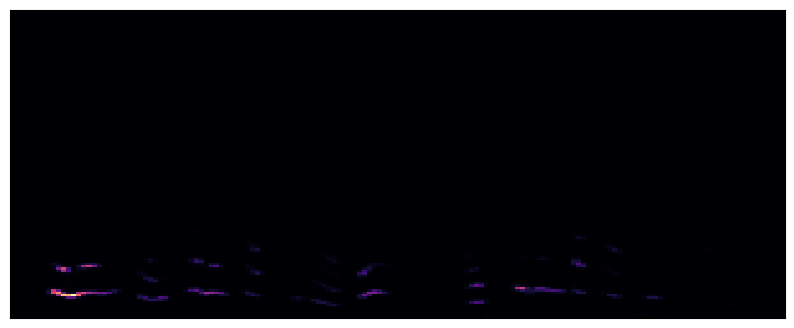

In [17]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec, sr=sr)
plt.show()

## 음악으로 복원하기

In [19]:
melspec_new = np.load('../data/proceed/test_mel.npy')

In [21]:
res = librosa.feature.inverse.mel_to_audio(
    melspec_new,
    sr=sr,
    n_fft=2048, # 푸리에변환을 하기위한 윈도우 크기
    hop_length=512,
    win_length=None,
    window="hann", # 음악을 잘랐을 때, 양사이드를 부드럽게 만들어줌
    center=True,
    pad_mode='reflect',
    power=2.0,
)

`uv add soundfile`

In [23]:
import soundfile
soundfile.write("../data/proceed/mel_wav.wav", res, sr)

# 사운드를 학습용 melspectogram 이미지로 변환

In [25]:
y,sr = librosa.load('../data/raw/1000.wav',sr=None)

In [26]:
spec = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,fmax=8000)

In [27]:
s_db = librosa.power_to_db(spec,ref=np.max) #귀로 들을수있는 db 단위로 변환

<Figure size 1000x400 with 0 Axes>

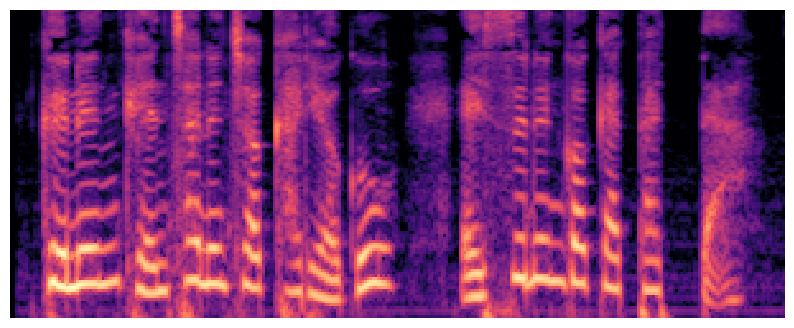

In [29]:
plt.figure(figsize=(10,4))
fig,ax = plt.subplots(figsize=(10,4))
img = librosa.display.specshow(s_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=ax)
plt.axis('off')
plt.savefig('melspec_1.png',bbox_inches='tight',pad_inches=0)